In [1]:
from scipy.sparse import csr_matrix, load_npz, save_npz
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from umap import UMAP 
from sklearn.decomposition import PCA

In [2]:
def lsi_ATAC(X, k = 100, use_first = False):
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.decomposition import TruncatedSVD

    bin_X = np.where(X < 1, 0, 1)
    tfidf = TfidfTransformer(norm='l2', sublinear_tf=True)
    normed_count = tfidf.fit_transform(bin_X)
    lsi = TruncatedSVD(n_components = k, random_state=42)
    lsi_r = lsi.fit_transform(normed_count)
    if use_first:
        return lsi_r
    else:
        return lsi_r[:, 1:]


def plot_latent(z, anno = None, save = None, figsize = (20,10), axis_label = "Latent", **kwargs):

    _kwargs = {
        "s": 10,
        "alpha": 0.9,
    }
    _kwargs.update(kwargs)

    fig = plt.figure(figsize = figsize)

    ax = fig.add_subplot()
    cluster_types = [x for x in np.unique(anno)]
    colormap = plt.cm.get_cmap("tab20", len(cluster_types))

    for i, cluster_type in enumerate(cluster_types):
        index = np.where(anno == cluster_type)[0]

        if index.shape[0] != 0:
            ax.scatter(z[index,0], z[index,1], color = colormap(i), label = cluster_type, **_kwargs)
    # axs[0].legend(fontsize = font_size)
    ax.legend(loc='upper left', prop={'size': 15}, frameon = False, ncol = 1, bbox_to_anchor=(1.04, 1))
    # ax.set_title("scATAC-Seq", fontsize = 25)

    ax.tick_params(axis = "both", which = "major", labelsize = 15)

    ax.set_xlabel(axis_label + " 1", fontsize = 19)
    ax.set_ylabel(axis_label + " 2", fontsize = 19)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)  

    if save:
        fig.savefig(save, bbox_inches = "tight")
    
    print(save)


In [11]:
c1xg = load_npz("C1xG.npz")
c2xr = load_npz("C2xR.npz")
meta_rna = pd.read_csv("meta_rna.csv", index_col = 0)
meta_atac = pd.read_csv("meta_atac.csv", index_col = 0)
regions = pd.read_csv("regions.txt", header = None)
genes = pd.read_csv("genes.txt", header = None)

None


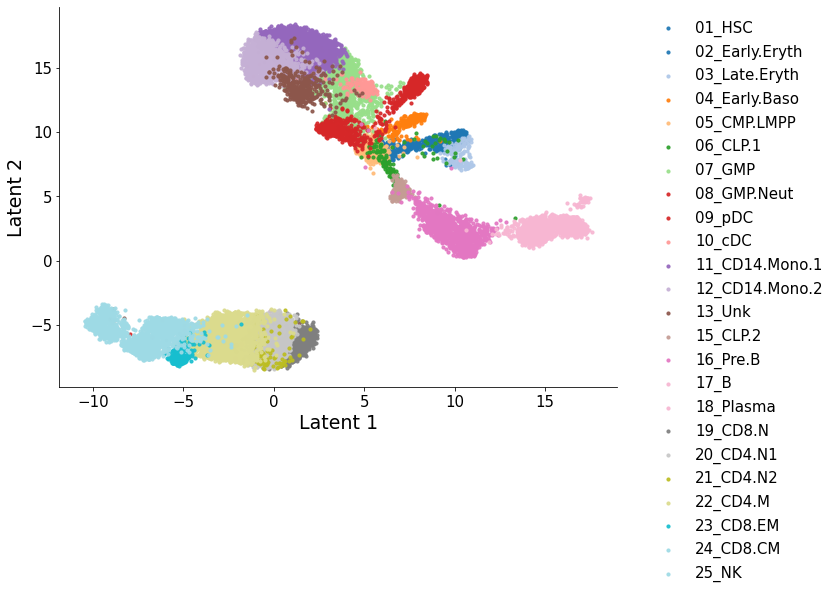

In [20]:
lsi_atac = lsi_ATAC(c2xr.todense(), k = 100)
umap_op = UMAP(n_components = 2, n_neighbors = 400, min_dist = 0.8)
umap_atac = umap_op.fit_transform(lsi_atac)
plot_latent(z = umap_atac, anno = meta_atac["cluster"].values, figsize = (10,7))

None


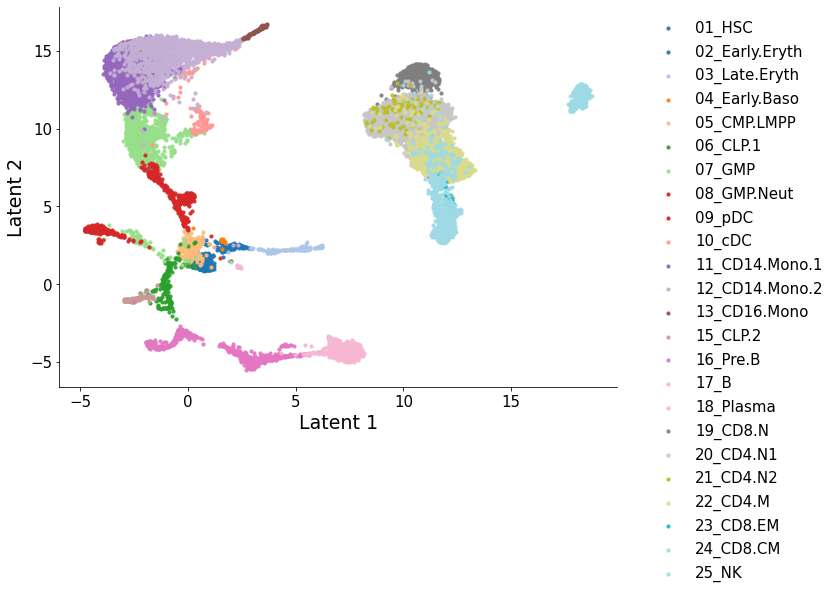

In [12]:
pca_rna = PCA(n_components = 30).fit_transform(c1xg.todense())
umap_op = UMAP(n_components = 2, n_neighbors = 30, min_dist = 0.3)
umap_rna = umap_op.fit_transform(pca_rna)
plot_latent(z = umap_rna, anno = meta_rna["cluster"].values, figsize = (10,7), save = None)

None


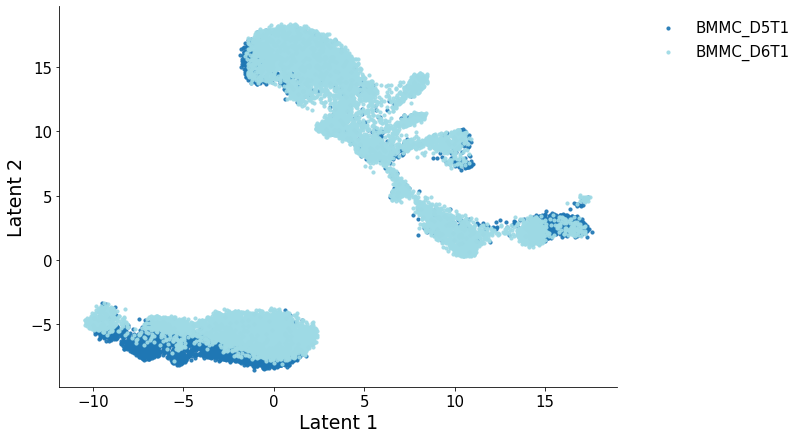

In [22]:
plot_latent(z = umap_atac, anno = meta_atac["batches"].values, figsize = (10,7), save = None)

None


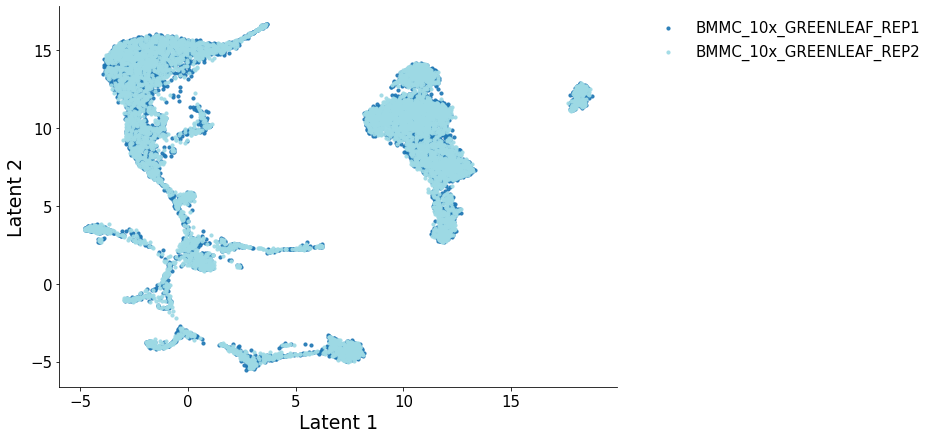

In [23]:
plot_latent(z = umap_rna, anno = meta_rna["batches"].values, figsize = (10,7), save = None)